# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [10]:
df = pd.read_csv('/content/projeto.csv', delimiter=',')

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [11]:
#Seu código aqui para a média
df.groupby('Categoria')['Preco_Normal'].mean().reset_index()

,Categoria,Preco_Normal
0,belleza-y-cuidado-personal,1783.556485
1,comidas-preparadas,3095.043478
2,congelados,2108.042553
3,frutas,1724.473684
4,instantaneos-y-sopas,765.491228
5,lacteos,2385.219239
6,verduras,1343.296875


In [12]:
#Seu código aqui para a mediana
df.groupby('Categoria')['Preco_Normal'].median().reset_index()

,Categoria,Preco_Normal
0,belleza-y-cuidado-personal,1569.0
1,comidas-preparadas,3290.0
2,congelados,1519.0
3,frutas,1195.0
4,instantaneos-y-sopas,439.0
5,lacteos,989.0
6,verduras,1180.0


0	belleza-y-cuidado-personal	Acima da mediana
1	comidas-preparadas	Abaixo da mediana
2	congelados	Acima da mediana
3	frutas	Acima da mediana
4	instantaneos-y-sopas	Acima da mediana
5	lacteos	Acima da mediana
6	verduras	Acima da mediana

Digite aqui as categorias:

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [14]:
#Seu código aqui
desvio_padrao = df.groupby('Categoria')['Preco_Normal'].std().reset_index()
print(desvio_padrao)

                    Categoria  Preco_Normal
0  belleza-y-cuidado-personal   2210.041719
1          comidas-preparadas   2019.911428
2                  congelados   2111.539896
3                      frutas   1639.151114
4        instantaneos-y-sopas   1170.232869
5                     lacteos   3925.816164
6                    verduras   1012.699625


Digite nesse campo o comportamento que você identificou.

A categoria lacteos, que teve o maior desvio padrão, foi também a que apresentou a maior discrepância entre a média e a mediana, sendo que a média dos valores ficou quase 1500 acima da mediana, o que mostra que possuimos varios outliers com valor alto nessa categoria. Um comportamento similar pode ser observado nos congelados, porém em uma medida bem menor, como pode ser observado pela média bem mais próxima à mediana.
Já a categoria com o segundo maior desvio padrão, belleza, apresenta uma média e mediana bem próximas, o que mostra que os preços estão muito dispersos em relação à média, e sugere também a possível presença de outliers tanto para baixo quanto para cima da média.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

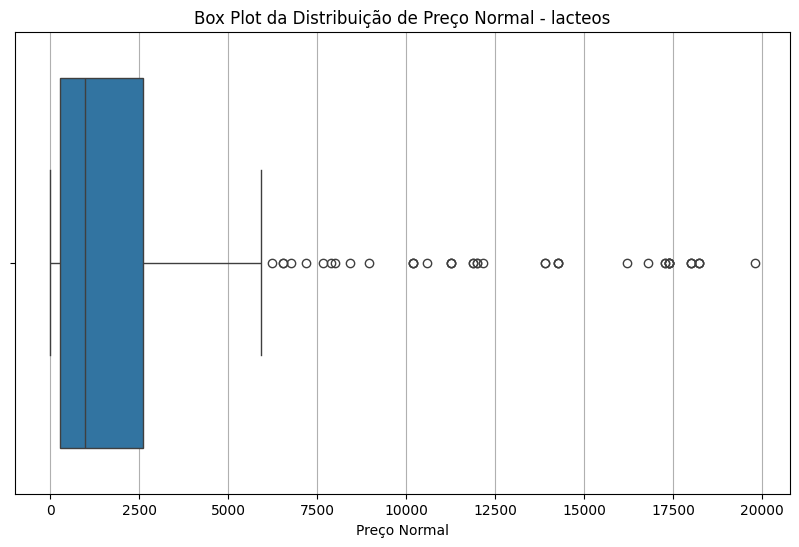

In [17]:
#Seu código aqui
import seaborn as sns

lacteos = df[df['Categoria'] == 'lacteos']
plt.figure(figsize=(10, 6))
sns.boxplot(x=lacteos['Preco_Normal'])
plt.title('Box Plot da Distribuição de Preço Normal - lacteos')
plt.xlabel('Preço Normal')
plt.grid(axis='x')
plt.show()

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

<ipython-input-19-482ac6bea6dd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Categoria', y='Media_Desconto', data=media_descontos, palette='viridis')


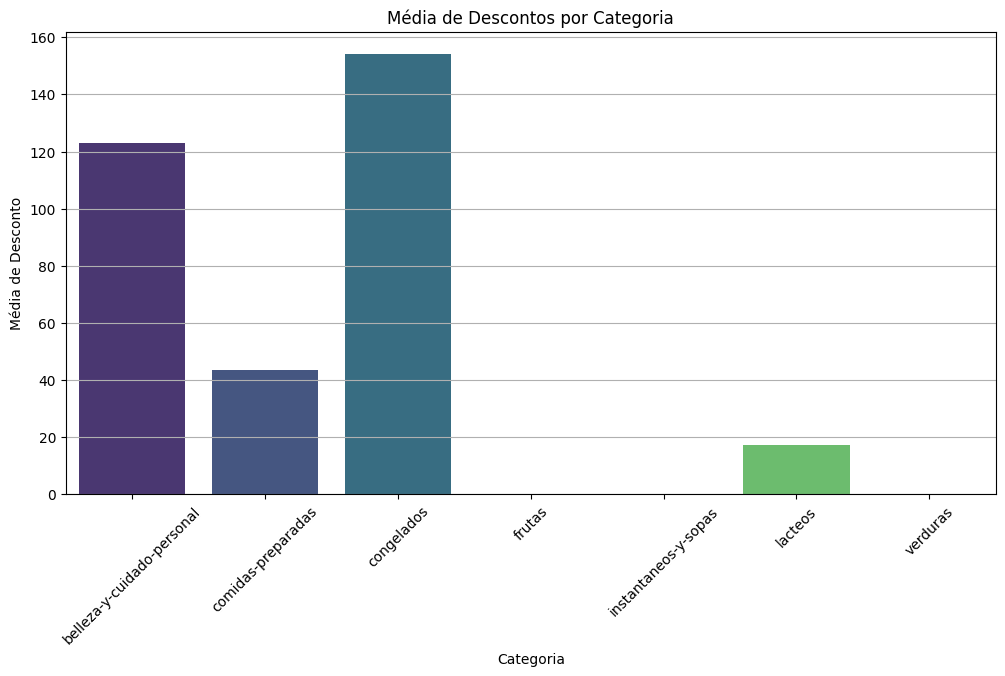

In [19]:
# Seu código aqui
media_descontos = df.groupby('Categoria')['Desconto'].mean().reset_index()
media_descontos.rename(columns={'Desconto': 'Media_Desconto'}, inplace=True)

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='Categoria', y='Media_Desconto', data=media_descontos, palette='viridis')
plt.title('Média de Descontos por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Média de Desconto')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [22]:
# Calcular a média de desconto por categoria e marca
media_desconto = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index()

# Criar o gráfico de mapa interativo
fig = px.bar(media_desconto,
             x='Categoria',
             y='Desconto',
             color='Marca',
             title='Média de Desconto por Categoria e Marca',
             labels={'Desconto': 'Média de Desconto', 'Categoria': 'Categoria'},
             text='Desconto')

# Atualizar o layout do gráfico
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_title='Categoria',
                  yaxis_title='Média de Desconto',
                  barmode='group',
                  xaxis_tickangle=-45)

# Exibir o gráfico
fig.show()
